In [ ]:
from google.colab import files
uploaded = files.upload()


Saving netflix_titles.csv to netflix_titles.csv


In [ ]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Plot settings
plt.style.use('seaborn-v0_8')
sns.set_palette('Set2')


In [ ]:
# Load the Netflix dataset into a DataFrame
df = pd.read_csv('netflix_titles.csv')

# View the first few rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Shape of dataset (rows, columns)
print("Dataset shape:", df.shape)

# Columns & data types
df.info()

# Check for missing values
df.isnull().sum()


Dataset shape: (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year and month only if 'date_added' exists
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Fill missing 'country' and 'rating' with 'Unknown'
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')

# Fill missing 'director' and 'cast' with 'No Data'
df['director'] = df['director'].fillna('No Data')
df['cast'] = df['cast'].fillna('No Data')


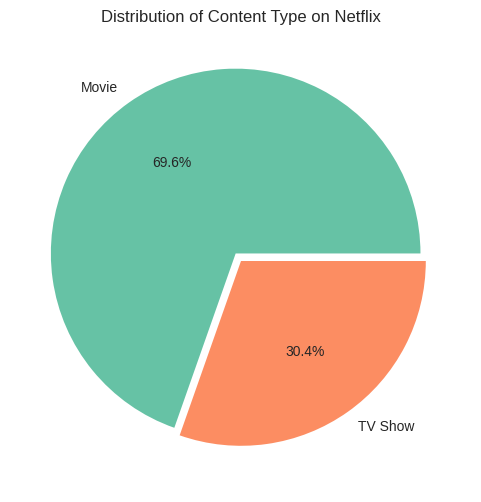

In [ ]:
# Count of each content type
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0], figsize=(6, 6))
plt.title('Distribution of Content Type on Netflix')
plt.ylabel('')
plt.show()


🧩 Netflix's Content Strategy Heavily Favors Movies
~70% of content is Movies vs only ~30% TV Shows.

**This suggests:**

Netflix might be investing more in quick-consumption content.

There may be a gap for long-form, episodic content.

** Business Insight:**

If Netflix wants to increase user engagement time, it should expand its TV Show portfolio, especially in trending genres like crime and reality.

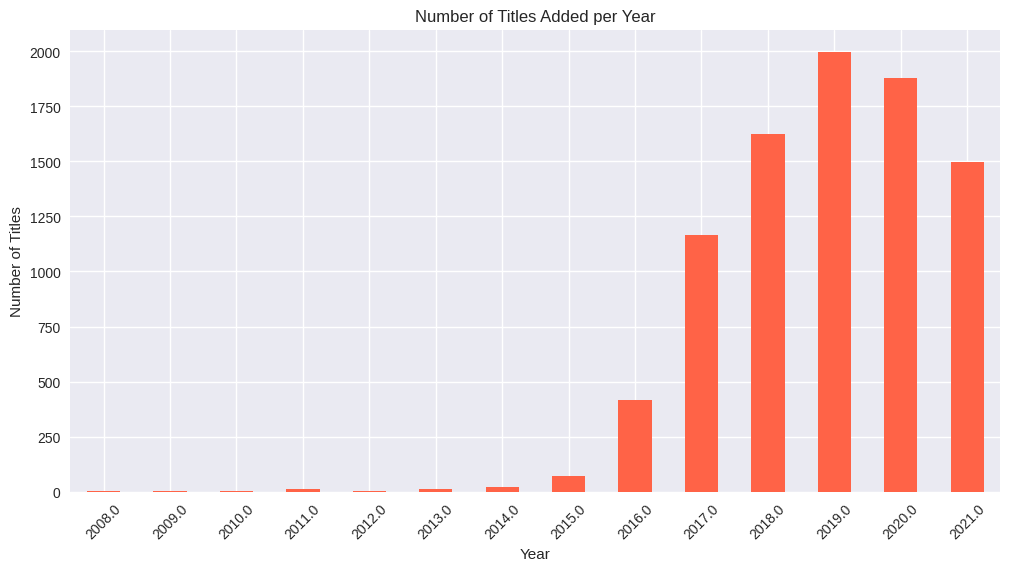

In [ ]:
# Barplot: titles added by year
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(12,6), color='tomato')
plt.title('Number of Titles Added per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

📈  Peak Content Addition Years Were 2018–2020
Content uploads peaked between 2018–2020, likely due to:

Original content investment

COVID-related streaming boom

There has been a slowdown post-2021.

🔍 Business Insight:

To regain growth, Netflix could analyze content retention metrics and double down on successful formats or franchises from that period.

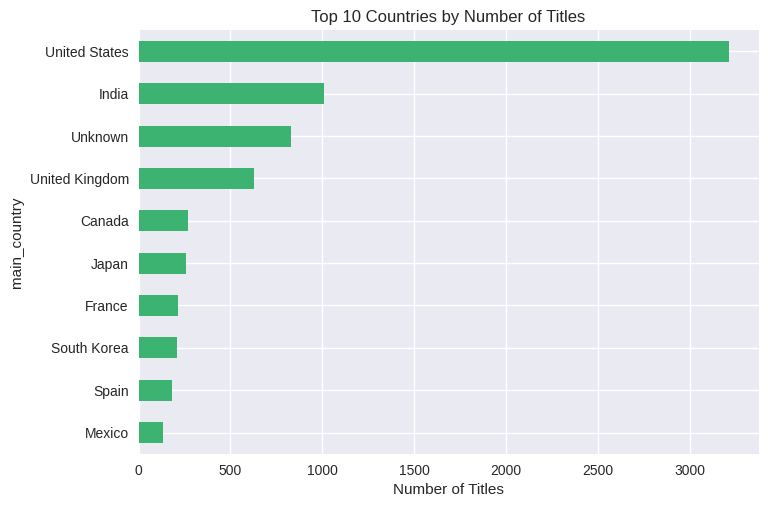

In [ ]:
# Some rows have multiple countries separated by commas. We take only the first country.
df['main_country'] = df['country'].apply(lambda x: x.split(',')[0])

# Top countries
top_countries = df['main_country'].value_counts().head(10)

top_countries.plot(kind='barh', color='mediumseagreen')
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis()
plt.show()


🌍 U.S. Dominates the Content Library — But Global Diversity Is Limited
Over 35% of content is produced in the United States.

Countries like India, UK, Canada follow, but a long tail of nations is underrepresented.

🔍 Business Insight:

There is a content diversity gap. Netflix can expand into African, Middle Eastern, or Southeast Asian markets by producing local originals and targeting underserved languages.

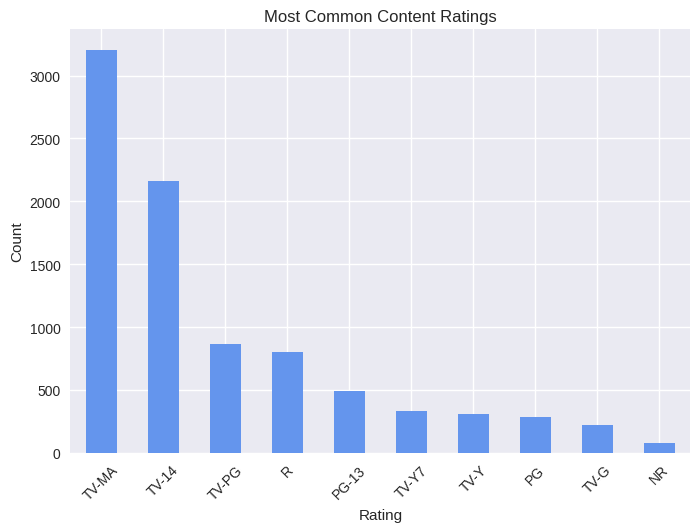

In [22]:
# Ratings
df['rating'].value_counts().head(10).plot(kind='bar', color='cornflowerblue')
plt.title('Most Common Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


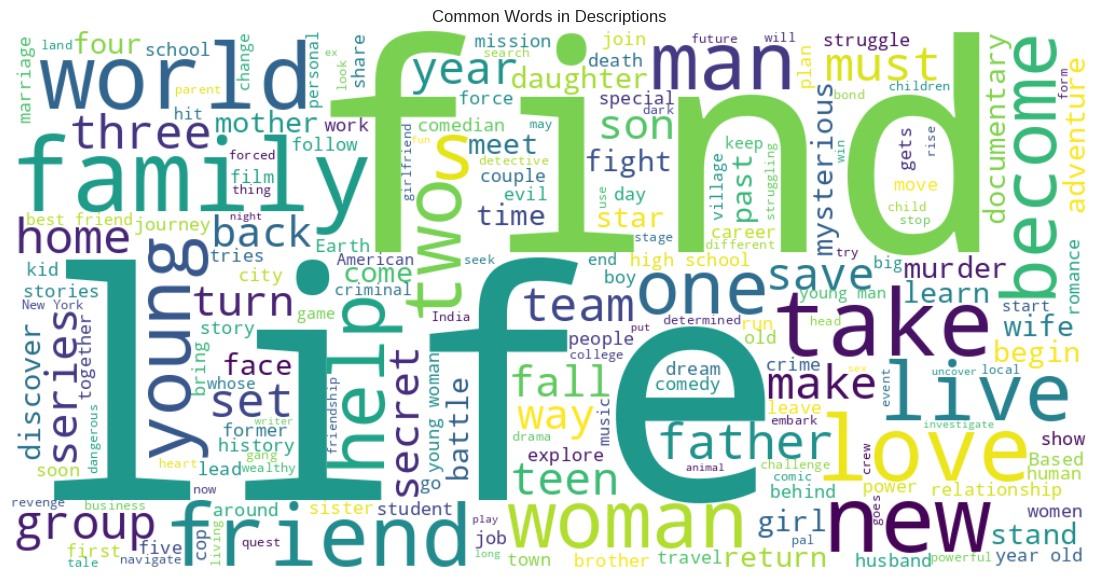

In [ ]:
# Drop NaNs in description
desc_text = ' '.join(df['description'].dropna())

# Generate wordcloud
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(desc_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Descriptions')
plt.show()


In [ ]:
# Download VADER Lexicon
import nltk
nltk.download('vader_lexicon')

# Import the SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Initialize VADER
sia = SentimentIntensityAnalyzer()


In [ ]:
# Drop rows with missing descriptions
df_sent = df.dropna(subset=['description']).copy()

# Apply sentiment analysis
df_sent['sentiment_scores'] = df_sent['description'].apply(lambda x: sia.polarity_scores(x))

# Extract compound score and classify sentiment
df_sent['compound'] = df_sent['sentiment_scores'].apply(lambda x: x['compound'])
df_sent['sentiment'] = df_sent['compound'].apply(
    lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral')
)


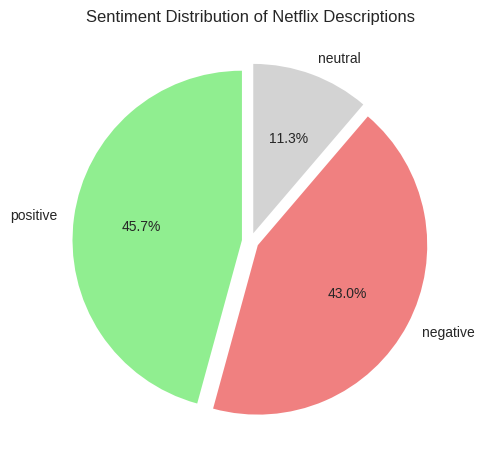

In [ ]:
# Count sentiment categories
sentiment_counts = df_sent['sentiment'].value_counts()

# Pie chart
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=[0.05]*3, colors=['lightgreen', 'lightcoral', 'lightgrey'])
plt.title('Sentiment Distribution of Netflix Descriptions')
plt.ylabel('')
plt.show()


**Positive Sentiment** in Descriptions Still Underleveraged
While **45.7%** of titles currently feature positive sentiment in their descriptions, over half remain neutral or slightly negative—even for inherently light-hearted genres like comedies, romances, and feel-good content.

🔍 **Business Insight:**
Netflix can further optimize title descriptions by incorporating more emotionally engaging, positive language—especially in content designed to uplift or entertain.

**Impact:**
Improved click-through rates, enhanced content discoverability, and stronger user engagement, particularly within mood-driven viewing segments.

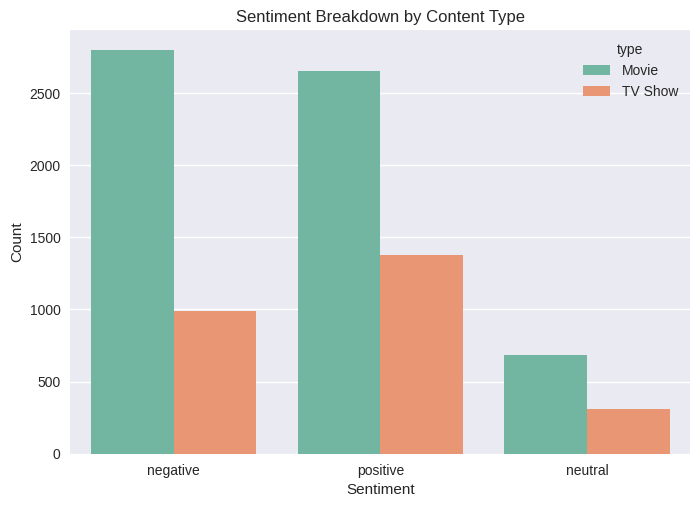

In [ ]:
# Cross-tab between sentiment and content type (Movie/TV Show)
sns.countplot(data=df_sent, x='sentiment', hue='type', palette='Set2')
plt.title('Sentiment Breakdown by Content Type')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [ ]:
# Show a few examples from each sentiment
for s in ['positive', 'neutral', 'negative']:
    print(f"\n📌 {s.upper()} samples:\n")
    print(df_sent[df_sent['sentiment'] == s]['description'].sample(3, random_state=42).values)



📌 POSITIVE samples:

['When a busy entrepreneur pauses her career to spend time with her aging father, both learn valuable lessons on happiness, love and living in the moment.'
 'While her mom is away, a teen sneaks out of the hippie commune where she lives and embarks on a life-changing adventure to discover who her father is.'
 'Wander the New York City streets and fascinating mind of wry writer, humorist and raconteur Fran Lebowitz as she sits down with Martin Scorsese.']

📌 NEUTRAL samples:

['The Emmy-nominated series delves into the juicy, smoky world of barbecue, visiting acclaimed chefs and pitmasters in the US, Australia and Mexico.'
 'When a beloved secret agent falls deep into a coma, his bumbling brother must defend their community from a divisive political threat.'
 'Psychic Hiroyuki Ehara leads various celebrities through spiritual consultations, probing into their issues and spotlighting their accomplishments.']

📌 NEGATIVE samples:

['A two-year-old must fend for herse